In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset
!unzip fake-and-real-news-dataset.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 76% 31.0M/41.0M [00:00<00:00, 59.5MB/s]
100% 41.0M/41.0M [00:00<00:00, 104MB/s] 
Archive:  fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


#Import library and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

import nltk
import nltk as nlp
import string
import re
realNews = pd.read_csv("True.csv")
fakeNews = pd.read_csv("Fake.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [3]:
realNews['target'],fakeNews['target'] = 'real','fake'
News = pd.concat([realNews,fakeNews]).reset_index(drop=True)
News.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",real


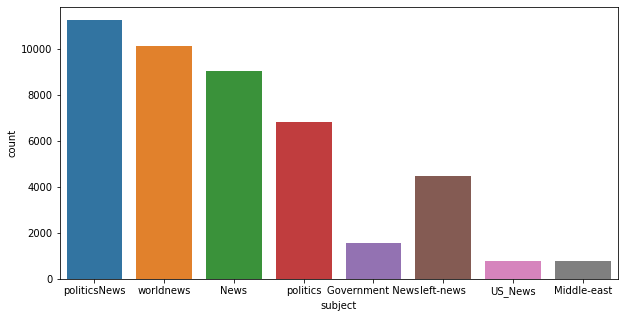

In [4]:
plt.figure(figsize=(10,5))
sns.countplot("subject", data=News)
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


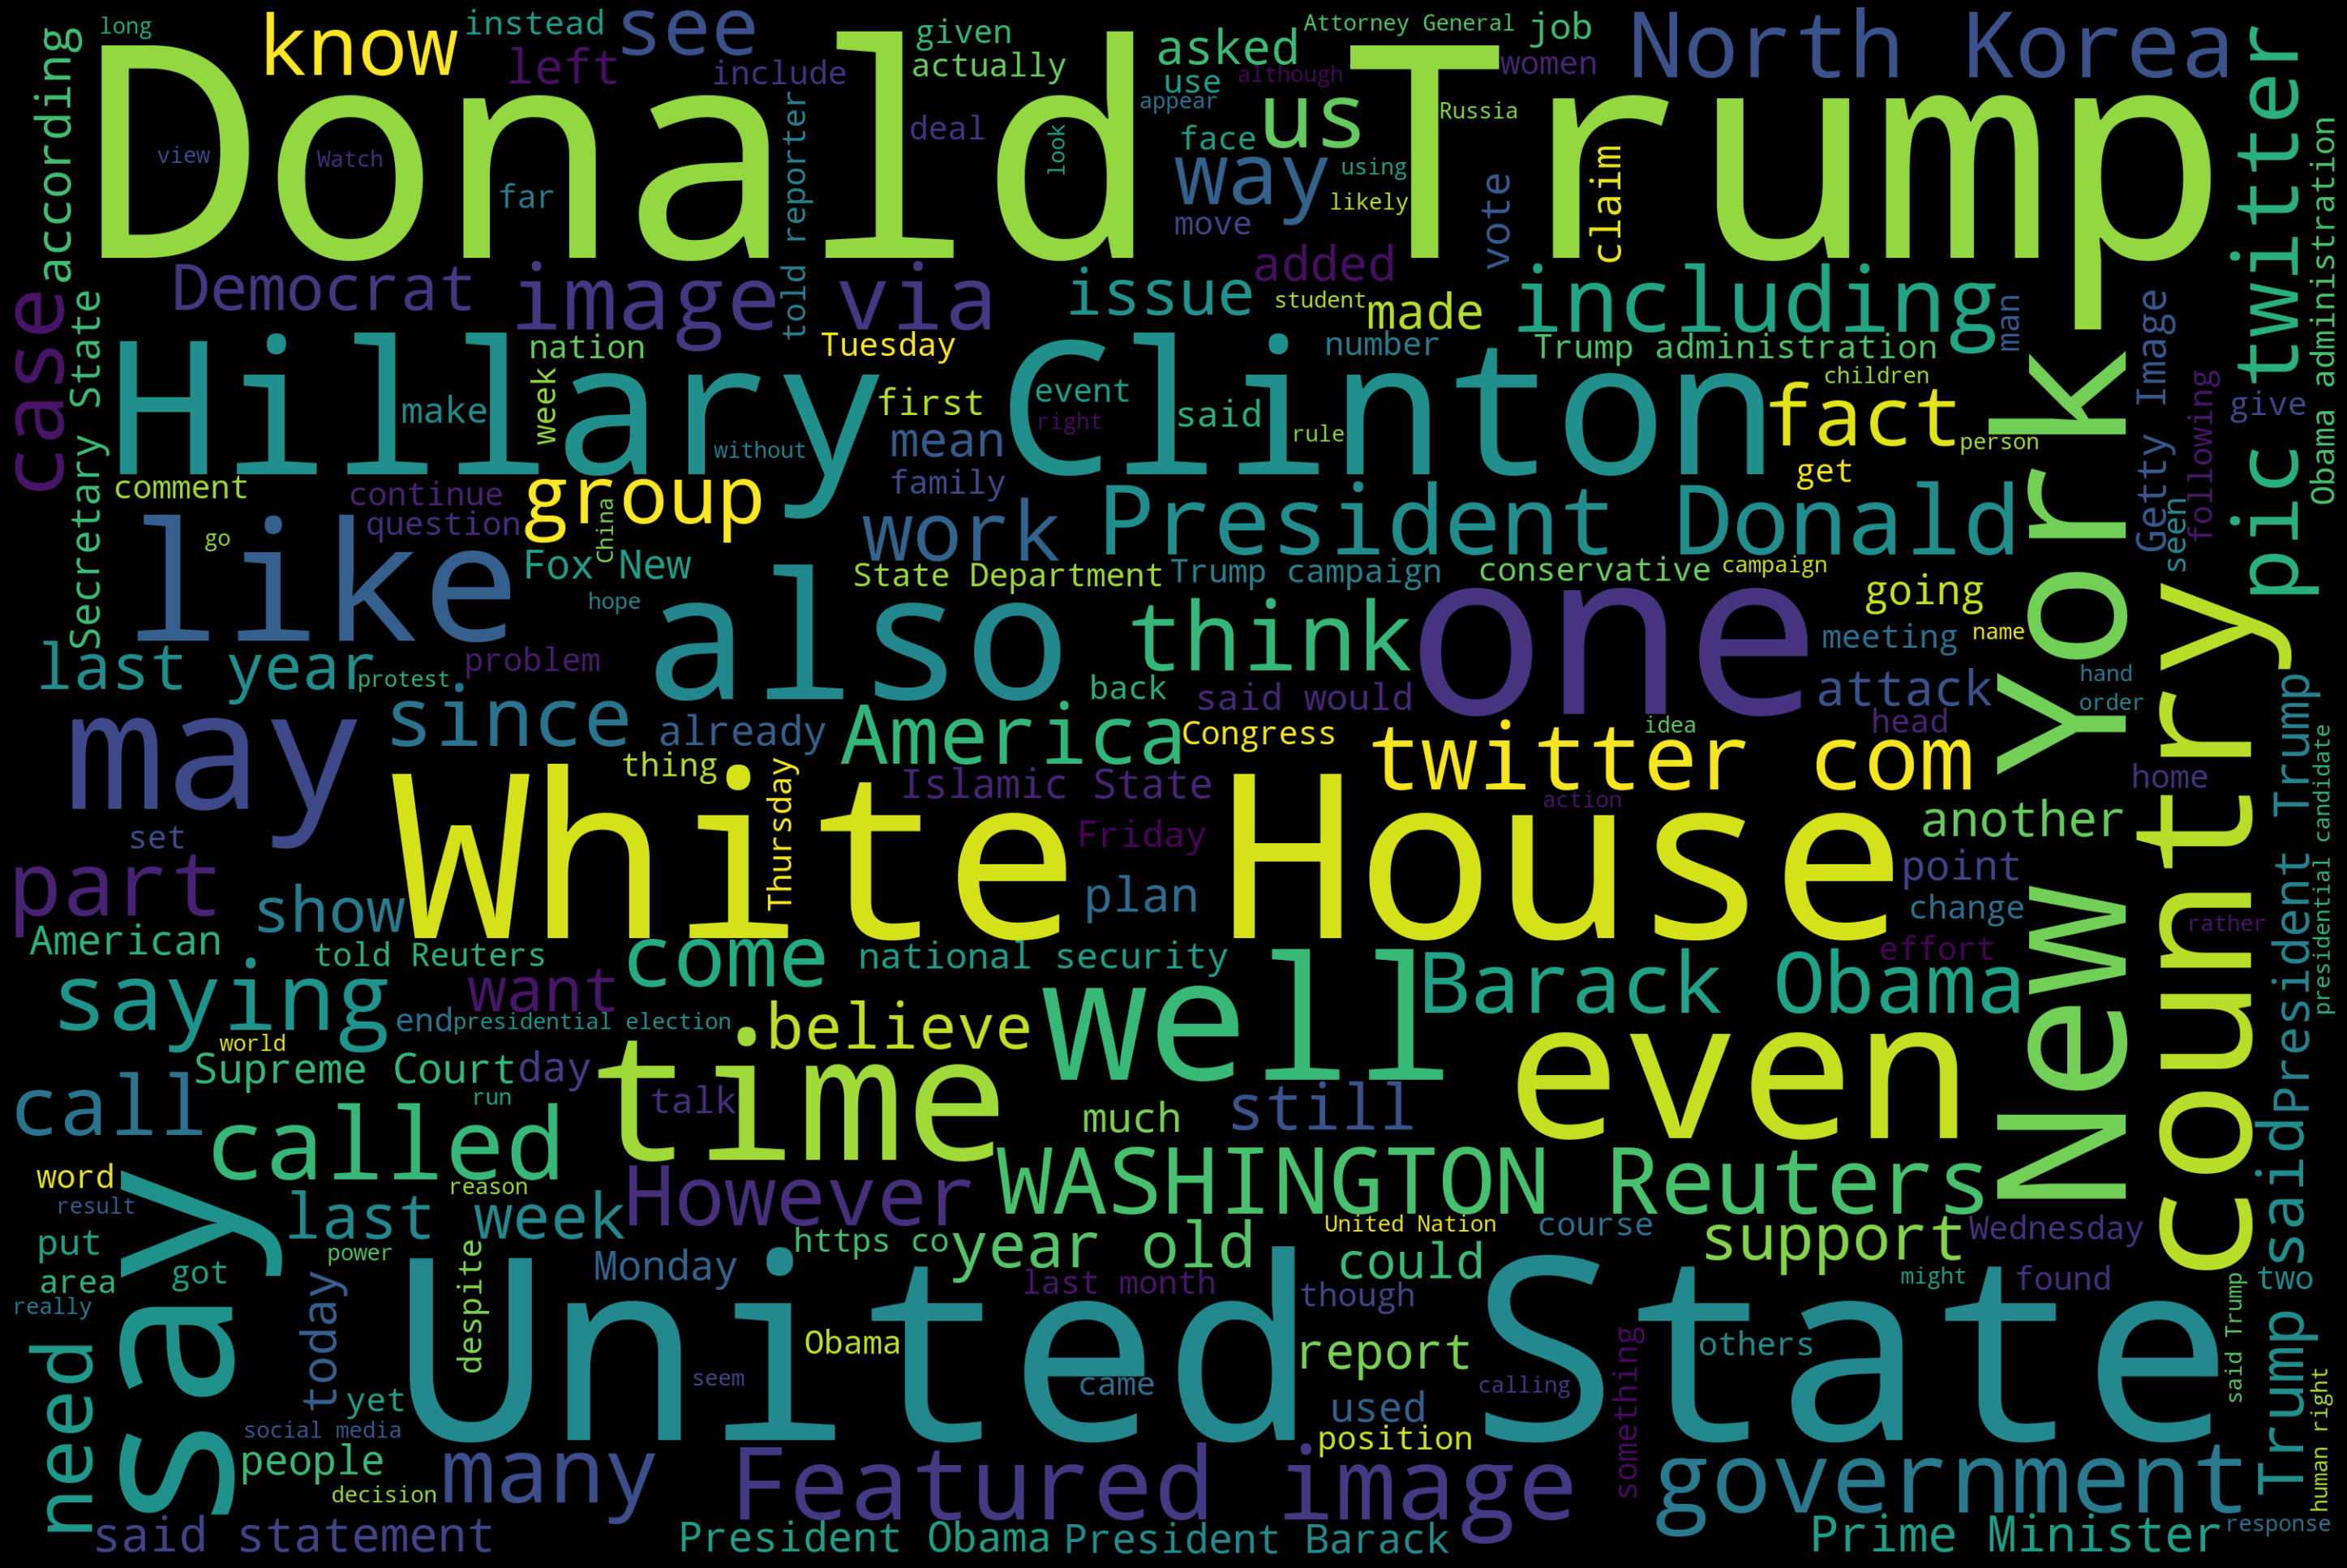

In [5]:
#Word Cloud
from wordcloud import WordCloud
nltk.download('stopwords')

text = ''
for news in News.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

Splitting Data

In [0]:
x_train,x_test,y_train,y_test = train_test_split(News['text'], News.target, test_size=0.2, random_state=2020)

#Logistic Regression Classifier

In [7]:
%%time
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print('accuracy : ', accuracy_score(y_test,prediction))

accuracy :  0.9881959910913141
CPU times: user 15.9 s, sys: 2.19 s, total: 18.1 s
Wall time: 15.6 s


In [8]:
print(confusion_matrix(y_test,prediction))

[[4623   59]
 [  47 4251]]


In [9]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4682
        real       0.99      0.99      0.99      4298

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



#Support Vector Classifier

In [10]:
%%time
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LinearSVC())])

model = pipe.fit(x_train,y_train)
prediction = model.predict(x_test)
print('accuracy =', accuracy_score(y_test,prediction))

accuracy = 0.9948775055679288
CPU times: user 13.2 s, sys: 48.9 ms, total: 13.2 s
Wall time: 13.2 s


In [11]:
print(confusion_matrix(y_test,prediction))

[[4656   26]
 [  20 4278]]


In [12]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

        fake       1.00      0.99      1.00      4682
        real       0.99      1.00      0.99      4298

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



#Naive Bayes Classifier

##Multinomial NB

In [13]:
%%time
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

model = pipe.fit(x_train,y_train)
prediction = model.predict(x_test)
print('accuracy :',accuracy_score(y_test,prediction))

accuracy : 0.9390868596881959
CPU times: user 12.8 s, sys: 35.9 ms, total: 12.8 s
Wall time: 12.8 s


In [14]:
print(confusion_matrix(y_test,prediction))

[[4441  241]
 [ 306 3992]]


In [15]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

        fake       0.94      0.95      0.94      4682
        real       0.94      0.93      0.94      4298

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



##Bernoulli NB

In [16]:
%%time
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])

model = pipe.fit(x_train,y_train)
prediction = model.predict(x_test)
print('accuracy :', accuracy_score(y_test,prediction))

accuracy : 0.9417594654788418
CPU times: user 12.8 s, sys: 49.1 ms, total: 12.9 s
Wall time: 12.9 s


In [17]:
print(confusion_matrix(y_test,prediction))

[[4303  379]
 [ 144 4154]]


In [18]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

        fake       0.97      0.92      0.94      4682
        real       0.92      0.97      0.94      4298

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



#Gradient Boost Classifier

In [19]:
%%time
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier())])

model = pipe.fit(x_train,y_train)
prediction = model.predict(x_test)
print('accuracy :', accuracy_score(y_test,prediction))

accuracy : 0.9955456570155902
CPU times: user 5min 19s, sys: 462 ms, total: 5min 19s
Wall time: 5min 20s


In [20]:
print(confusion_matrix(y_test,prediction))

[[4653   29]
 [  11 4287]]


In [21]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

        fake       1.00      0.99      1.00      4682
        real       0.99      1.00      1.00      4298

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



#XGBoost Classifier

In [22]:
%%time
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss = 'deviance',
                                         learning_rate=0.01,
                                         n_estimator=10,
                                         max_depth=5,
                                         random_state=2020))])

model = pipe.fit(x_train,y_train)
prediction = model.predict(x_test)
print('accuracy :',accuracy_score(y_test,prediction))

accuracy : 0.99543429844098
CPU times: user 3min 13s, sys: 245 ms, total: 3min 13s
Wall time: 3min 13s


In [23]:
print(confusion_matrix(y_test,prediction))

[[4652   30]
 [  11 4287]]


In [24]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

        fake       1.00      0.99      1.00      4682
        real       0.99      1.00      1.00      4298

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



#Stochactic Gradient Descent

In [25]:
%%time
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', SGDClassifier())])

model = pipe.fit(x_train,y_train)
prediction = model.predict(x_test)
print('accuracy :', accuracy_score(y_test,prediction))

accuracy : 0.9912026726057906
CPU times: user 12.7 s, sys: 123 ms, total: 12.8 s
Wall time: 12.7 s


In [26]:
print(confusion_matrix(y_test,prediction))

[[4637   45]
 [  34 4264]]


In [27]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4682
        real       0.99      0.99      0.99      4298

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



#Decision Tree

In [28]:
%%time
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion='entropy',
                                                  max_depth=10,
                                                  splitter='best',
                                                  random_state=2020))])

model = pipe.fit(x_train,y_train)
prediction = model.predict(x_test)
print('accuracy :',accuracy_score(y_test,prediction))

accuracy : 0.9953229398663697
CPU times: user 28 s, sys: 34 ms, total: 28 s
Wall time: 28 s


In [29]:
print(confusion_matrix(y_test,prediction))

[[4660   22]
 [  20 4278]]


In [30]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

        fake       1.00      1.00      1.00      4682
        real       0.99      1.00      1.00      4298

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



#Random Forest Classifier

In [31]:
%%time
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])

model = pipe.fit(x_train,y_train)
prediction = model.predict(x_test)
print('accuracy :', accuracy_score(y_test,prediction))

accuracy : 0.9925389755011136
CPU times: user 1min 28s, sys: 54.9 ms, total: 1min 28s
Wall time: 1min 28s


In [32]:
print(confusion_matrix(y_test,prediction))

[[4653   29]
 [  38 4260]]


In [33]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4682
        real       0.99      0.99      0.99      4298

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



#KNN Classifier

In [34]:
%%time
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors=10,
                                                weights='distance',
                                                algorithm='brute'))])

model = pipe.fit(x_train,y_train)
prediction = model.predict(x_test)
print('accuracy :', accuracy_score(y_test,prediction))

accuracy : 0.6671492204899777
CPU times: user 59.1 s, sys: 1.42 s, total: 1min
Wall time: 1min


In [35]:
print(confusion_matrix(y_test,prediction))

[[4638   44]
 [2945 1353]]


In [36]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

        fake       0.61      0.99      0.76      4682
        real       0.97      0.31      0.48      4298

    accuracy                           0.67      8980
   macro avg       0.79      0.65      0.62      8980
weighted avg       0.78      0.67      0.62      8980



#Long-Short Term Memory (LSTM)

In [0]:
X = News.text
Y = News.target
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)
max_words = 500
max_len = 75
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

def RNN():
  inputs = Input(name='inputs',shape=[max_len])
  layer = Embedding(max_words,50,input_length=max_len)(inputs)
  layer = LSTM(64)(layer)
  layer = Dense(256,name='FC1')(layer)
  layer = Activation('relu')(layer)
  layer = Dropout(0.5)(layer)
  layer = Dense(1,name='out_layer')(layer)
  layer = Activation('sigmoid')(layer)
  model = Model(inputs=inputs,outputs=layer)
  return model

model = RNN()

In [0]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model1.png')
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [40]:
%%time
model.fit(sequences_matrix,Y_train,
          batch_size=256,
          epochs=5,
          validation_split=0.2,
          callbacks=[EarlyStopping(monitor='val_loss',
                                   min_delta=0.0001)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 30530 samples, validate on 7633 samples
Epoch 1/5
30530/30530 [==============================] - 37s 1ms/step - loss: 0.1991 - accuracy: 0.9231 - val_loss: 0.1260 - val_accuracy: 0.9608
Epoch 2/5
30530/30530 [==============================] - 35s 1ms/step - loss: 0.0851 - accuracy: 0.9694 - val_loss: 0.0732 - val_accuracy: 0.9742
Epoch 3/5
30530/30530 [==============================] - 37s 1ms/step - loss: 0.0697 - accuracy: 0.9743 - val_loss: 0.0760 - val_accuracy: 0.9725
CPU times: user 2min 38s, sys: 25.9 s, total: 3min 4s
Wall time: 1min 50s


In [41]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
accr = model.evaluate(test_sequences_matrix,Y_test)
print('Accuracy: {:0.2f}'.format(accr[1]))

6735/6735 [==============================] - 2s 318us/step
Accuracy: 0.97
